In [56]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [57]:
df = pd.read_csv('.\\medeallian data\\gold\\final (1).csv')
df.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Molecular Weight,AlogP,Label
0,CHEMBL1200781,Br.CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,Ki,0.78,405.31,3.81,1
1,CHEMBL1489369,Br.CN1CCc2cc(Br)c(O)cc2C(c2ccccc2)C1,Ki,17.18,413.15,3.77,1
2,CHEMBL1237149,Br.O=c1[nH]c2cccc(N3C[C@H]4C[C@@H]3CN4CC3CCc4[...,Ki,460.00,513.41,3.81,1
3,CHEMBL2062257,Brc1c(NC2=NCCN2)ccc2nccnc12.O=C(O)C(O)C(O)C(=O)O,Ki,10000.00,442.23,1.76,0
4,CHEMBL1644601,Brc1cc(O[C@@H]2C[C@H]3CC[C@@H](C2)N3)cc(-c2ccc...,IC50,2610.00,358.28,4.78,0


In [58]:
fingerprint = []
valid_index = []
for i, smile in enumerate(df['Smiles']):
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint.append(list(fp))
        valid_index.append(i)
fp_df = pd.DataFrame(fingerprint,columns=[f'FP_{i}' for i in range(2048)])
df_valid = df.iloc[valid_index].reset_index(drop = True)

[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerator
[00:53:35] DEPRECATION WARNING: please use MorganGenerat

In [59]:
df_valid.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Molecular Weight,AlogP,Label
0,CHEMBL1200781,Br.CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,Ki,0.78,405.31,3.81,1
1,CHEMBL1489369,Br.CN1CCc2cc(Br)c(O)cc2C(c2ccccc2)C1,Ki,17.18,413.15,3.77,1
2,CHEMBL1237149,Br.O=c1[nH]c2cccc(N3C[C@H]4C[C@@H]3CN4CC3CCc4[...,Ki,460.00,513.41,3.81,1
3,CHEMBL2062257,Brc1c(NC2=NCCN2)ccc2nccnc12.O=C(O)C(O)C(O)C(=O)O,Ki,10000.00,442.23,1.76,0
4,CHEMBL1644601,Brc1cc(O[C@@H]2C[C@H]3CC[C@@H](C2)N3)cc(-c2ccc...,IC50,2610.00,358.28,4.78,0


In [ ]:
num_h_donors = []
num_h_acceptors = []
tpsa = []
num_rotatable_bonds = []
num_aromatic_rings = []
num_saturated_rings = []
num_aliphatic_rings = []
num_heteroatoms = []
mol_logp = []
num_rings = []
for i, smiles in enumerate(df_valid['Smiles']):
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            num_h_donors.append(Descriptors.NumHDonors(mol))
            num_h_acceptors.append(Descriptors.NumHAcceptors(mol))
            tpsa.append(Descriptors.TPSA(mol))
            num_rotatable_bonds.append(Descriptors.NumRotatableBonds(mol))
            num_aromatic_rings.append(Descriptors.NumAromaticRings(mol))
            num_saturated_rings.append(Descriptors.NumSaturatedRings(mol))
            num_aliphatic_rings.append(Descriptors.NumAliphaticRings(mol))
            num_heteroatoms.append(Descriptors.NumHeteroatoms(mol))
            mol_logp.append(Descriptors.MolLogP(mol))
            num_rings.append(Descriptors.RingCount(mol))
desc_df = pd.DataFrame({
    'NumHDonors': num_h_donors,
    'NumHAcceptors': num_h_acceptors,
    'TPSA': tpsa,
    'NumRotatableBonds': num_rotatable_bonds,
    'NumAromaticRings': num_aromatic_rings,
    'NumSaturatedRings': num_saturated_rings,
    'NumAliphaticRings': num_aliphatic_rings,
    'NumHeteroatoms': num_heteroatoms,
    'MolLogP': mol_logp,
    'NumRings': num_rings
}
)

In [61]:
desc_df

,NumHDonors,NumHAcceptors,TPSA,NumRotatableBonds,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumHeteroatoms,MolLogP,NumRings
0,0,3,36.26,5,2,0,1,5,4.39088,3
1,1,2,23.47,1,2,0,1,4,4.35240,3
2,2,4,68.27,3,4,2,3,8,4.38740,7
3,6,9,177.26,4,2,0,1,12,-0.35920,3
4,1,2,21.26,3,2,2,2,3,4.77790,4
...,...,...,...,...,...,...,...,...,...,...
6079,0,6,42.76,7,3,2,3,6,4.25580,6
6080,0,4,15.71,6,2,2,3,4,5.28530,5
6081,0,5,24.94,6,2,2,3,5,4.13160,5
6082,0,6,37.83,6,2,2,3,6,3.52660,5


In [62]:
df_valid

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Molecular Weight,AlogP,Label
0,CHEMBL1200781,Br.CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,Ki,0.78,405.31,3.81,1
1,CHEMBL1489369,Br.CN1CCc2cc(Br)c(O)cc2C(c2ccccc2)C1,Ki,17.18,413.15,3.77,1
2,CHEMBL1237149,Br.O=c1[nH]c2cccc(N3C[C@H]4C[C@@H]3CN4CC3CCc4[...,Ki,460.00,513.41,3.81,1
3,CHEMBL2062257,Brc1c(NC2=NCCN2)ccc2nccnc12.O=C(O)C(O)C(O)C(=O)O,Ki,10000.00,442.23,1.76,0
4,CHEMBL1644601,Brc1cc(O[C@@H]2C[C@H]3CC[C@@H](C2)N3)cc(-c2ccc...,IC50,2610.00,358.28,4.78,0
...,...,...,...,...,...,...,...
6079,CHEMBL392196,c1cnn(-c2ccc([C@@H]3CN4CCC[C@@H]4c4cc(OCCCN5CC...,Ki,12.30,458.61,4.26,1
6080,CHEMBL246716,c1csc([C@@H]2CN3CCC[C@@H]3c3cc(OCCCN4CCCCC4)cc...,Ki,2.70,396.60,5.29,1
6081,CHEMBL246927,c1csc([C@@H]2CN3CCC[C@@H]3c3cc(OCCCN4CCOCC4)cc...,Ki,6.00,398.57,4.13,1
6082,CHEMBL391829,c1csc([C@@H]2CN3CCC[C@@H]3c3cc(OCCCN4CCOCC4)cc...,Ki,291.00,399.56,3.53,1


In [63]:
features = pd.concat([fp_df,desc_df,df_valid['Molecular Weight'],df_valid['AlogP']],axis=1)
target = df_valid['Label']

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

fig = sm.qqplot(features, line='s')

# Add a title to the plot
plt.title("Q-Q Plot of Sample Data against Normal Distribution")

# Display the plot
plt.show()

In [64]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [65]:
randomForestModel = RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_leaf=2,min_samples_split=5,class_weight='balanced',random_state=42,n_jobs=-1)
randomForestModel.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
y_train_pred= randomForestModel.predict(x_train)
y_test_pred = randomForestModel.predict(x_test)
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print(f"Accuracy while training: {train_accuracy}")
print(f"Accuracy while testing: {test_accuracy}")

Accuracy while training: 0.914115471543045
Accuracy while testing: 0.866885784716516


In [67]:
y_train_proba = randomForestModel.predict_proba(x_train)[:, 1]
y_test_proba = randomForestModel.predict_proba(x_test)[:, 1]

train_roc_auc = roc_auc_score(y_train,y_train_proba)
test_roc_auc = roc_auc_score(y_test,y_test_proba)
print("TRAINING PERFORMANCE:")
print(f"Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"ROC-AUC:  {train_roc_auc:.4f}")

print("\nTEST PERFORMANCE:")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"ROC-AUC:  {test_roc_auc:.4f}")

print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred, target_names=['Inactive', 'Active']))


TRAINING PERFORMANCE:
Accuracy: 0.9141 (91.41%)
ROC-AUC:  0.9763

TEST PERFORMANCE:
Accuracy: 0.8669 (86.69%)
ROC-AUC:  0.9243

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Inactive       0.72      0.85      0.78       337
      Active       0.94      0.87      0.90       880

    accuracy                           0.87      1217
   macro avg       0.83      0.86      0.84      1217
weighted avg       0.88      0.87      0.87      1217



In [68]:
cm = confusion_matrix(y_test,y_test_pred)
print(f"Confusion Metrix:\n{cm}")

Confusion Metrix:
[[287  50]
 [112 768]]


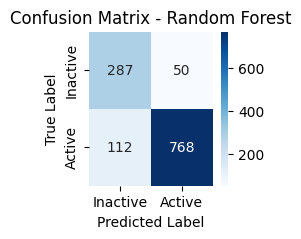

In [69]:
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Inactive', 'Active'],
            yticklabels=['Inactive', 'Active'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

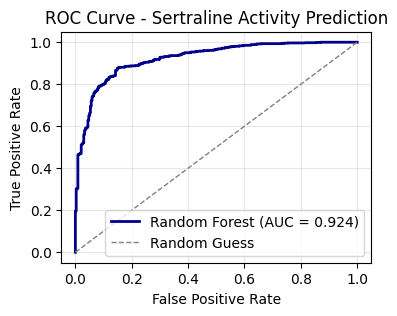

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'Random Forest (AUC = {test_roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sertraline Activity Prediction')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [71]:
with open("Random_Forest_Model.pkl","wb") as m:
    pickle.dump(randomForestModel,m)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(list(features.columns), f)

# logistic regression 

In [72]:
# Fill NaN values in x_train with column means because regression models cannot handle NaN values directly
x_train_filled = x_train.fillna(x_train.mean())
x_test_filled = x_test.fillna(x_test.mean())

logisticreggmodel = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logisticreggmodel.fit(x_train_filled, y_train)

c:\E\Machine Learning\ml project\all model\test\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [73]:
y_train_pred= logisticreggmodel.predict(x_train_filled)
y_test_pred = logisticreggmodel.predict(x_test_filled)
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print(f"Accuracy while training: {train_accuracy}")
print(f"Accuracy while testing: {test_accuracy}")

Accuracy while training: 0.9280871173207315
Accuracy while testing: 0.8438783894823336


In [74]:
y_train_proba = logisticreggmodel.predict_proba(x_train_filled)[:, 1]
y_test_proba = logisticreggmodel.predict_proba(x_test_filled)[:, 1]

train_roc_auc = roc_auc_score(y_train,y_train_proba)
test_roc_auc = roc_auc_score(y_test,y_test_proba)
print("TRAINING PERFORMANCE:")
print(f"Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"ROC-AUC:  {train_roc_auc:.4f}")

print("\nTEST PERFORMANCE:")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"ROC-AUC:  {test_roc_auc:.4f}")

print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred, target_names=['Inactive', 'Active']))

TRAINING PERFORMANCE:
Accuracy: 0.9281 (92.81%)
ROC-AUC:  0.9804

TEST PERFORMANCE:
Accuracy: 0.8439 (84.39%)
ROC-AUC:  0.9108

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Inactive       0.69      0.78      0.73       337
      Active       0.91      0.87      0.89       880

    accuracy                           0.84      1217
   macro avg       0.80      0.82      0.81      1217
weighted avg       0.85      0.84      0.85      1217



In [75]:
cm = confusion_matrix(y_test,y_test_pred)
print(f"Confusion Metrix:\n{cm}")

Confusion Metrix:
[[262  75]
 [115 765]]


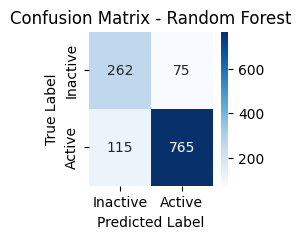

In [76]:
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Inactive', 'Active'],
            yticklabels=['Inactive', 'Active'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

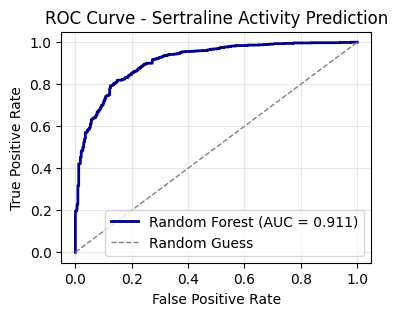

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'Random Forest (AUC = {test_roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sertraline Activity Prediction')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [78]:
with open("Logistic_Regression_Model.pkl","wb") as m:
    pickle.dump(randomForestModel,m)

# Naïve Bayes


In [ ]:
# Fill NaN values in x_train with column means because Naive Bayes cannot handle NaN values directly
x_train_filled = x_train.fillna(x_train.mean())
x_test_filled = x_test.fillna(x_test.mean()) 


,priors,None
,var_smoothing,1e-09


In [80]:
y_train_pred= naiveBayesModel.predict(x_train_filled)
y_test_pred = naiveBayesModel.predict(x_test_filled)
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print(f"Accuracy while training: {train_accuracy}")
print(f"Accuracy while testing: {test_accuracy}")


Accuracy while training: 0.8080953359358948
Accuracy while testing: 0.7370583401807724


In [81]:
y_train_proba = naiveBayesModel.predict_proba(x_train_filled)[:, 1]
y_test_proba = naiveBayesModel.predict_proba(x_test_filled)[:, 1]

train_roc_auc = roc_auc_score(y_train,y_train_proba)
test_roc_auc = roc_auc_score(y_test,y_test_proba)
print("TRAINING PERFORMANCE:")
print(f"Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"ROC-AUC:  {train_roc_auc:.4f}")

print("\nTEST PERFORMANCE:")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"ROC-AUC:  {test_roc_auc:.4f}")

print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred, target_names=['Inactive', 'Active']))


TRAINING PERFORMANCE:
Accuracy: 0.8081 (80.81%)
ROC-AUC:  0.9074

TEST PERFORMANCE:
Accuracy: 0.7371 (73.71%)
ROC-AUC:  0.8055

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Inactive       0.52      0.80      0.63       337
      Active       0.90      0.71      0.80       880

    accuracy                           0.74      1217
   macro avg       0.71      0.76      0.71      1217
weighted avg       0.80      0.74      0.75      1217



In [82]:
cm = confusion_matrix(y_test,y_test_pred)
print(f"Confusion Metrix:\n{cm}")


Confusion Metrix:
[[269  68]
 [252 628]]


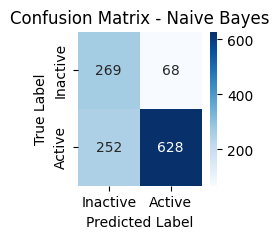

In [83]:
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Inactive', 'Active'],
            yticklabels=['Inactive', 'Active'])
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


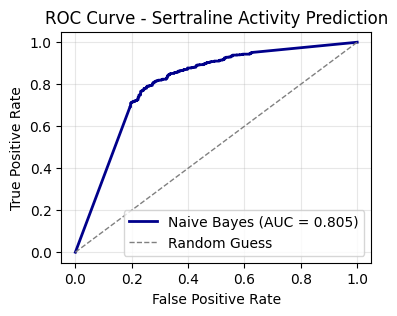

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'Naive Bayes (AUC = {test_roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sertraline Activity Prediction')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [85]:
with open("Naive_Bayes_Model.pkl","wb") as m:
    pickle.dump(naiveBayesModel,m)


In [86]:
# Gradient Boosting


In [87]:
# Fill NaN values in x_train with column means because Gradient Boosting cannot handle NaN values directly
x_train_filled = x_train.fillna(x_train.mean())
x_test_filled = x_test.fillna(x_test.mean())

gradientBoostingModel = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gradientBoostingModel.fit(x_train_filled, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [88]:
y_train_pred= gradientBoostingModel.predict(x_train_filled)
y_test_pred = gradientBoostingModel.predict(x_test_filled)
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print(f"Accuracy while training: {train_accuracy}")
print(f"Accuracy while testing: {test_accuracy}")


Accuracy while training: 0.9229504828436409
Accuracy while testing: 0.8512736236647493


In [89]:
y_train_proba = gradientBoostingModel.predict_proba(x_train_filled)[:, 1]
y_test_proba = gradientBoostingModel.predict_proba(x_test_filled)[:, 1]

train_roc_auc = roc_auc_score(y_train,y_train_proba)
test_roc_auc = roc_auc_score(y_test,y_test_proba)
print("TRAINING PERFORMANCE:")
print(f"Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"ROC-AUC:  {train_roc_auc:.4f}")

print("\nTEST PERFORMANCE:")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"ROC-AUC:  {test_roc_auc:.4f}")

print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred, target_names=['Inactive', 'Active']))


TRAINING PERFORMANCE:
Accuracy: 0.9230 (92.30%)
ROC-AUC:  0.9765

TEST PERFORMANCE:
Accuracy: 0.8513 (85.13%)
ROC-AUC:  0.9133

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Inactive       0.79      0.63      0.70       337
      Active       0.87      0.94      0.90       880

    accuracy                           0.85      1217
   macro avg       0.83      0.78      0.80      1217
weighted avg       0.85      0.85      0.85      1217



In [90]:
cm = confusion_matrix(y_test,y_test_pred)
print(f"Confusion Metrix:\n{cm}")


Confusion Metrix:
[[212 125]
 [ 56 824]]


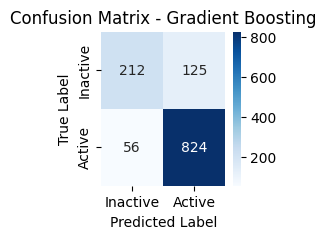

In [91]:
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Inactive', 'Active'],
            yticklabels=['Inactive', 'Active'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


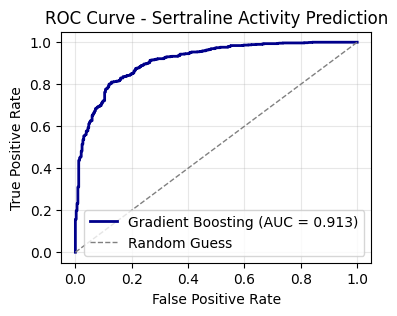

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'Gradient Boosting (AUC = {test_roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sertraline Activity Prediction')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [93]:
with open("Gradient_Boosting_Model.pkl","wb") as m:
    pickle.dump(gradientBoostingModel,m)


In [94]:
# Collecting all model accuracies for comparison using already defined models and variables
# Create filled datasets once (needed for Logistic Regression, Naive Bayes, and Gradient Boosting)
x_train_filled = x_train.fillna(x_train.mean())
x_test_filled = x_test.fillna(x_test.mean())

# Random Forest (uses x_train and x_test directly)
rf_train_acc = accuracy_score(y_train, randomForestModel.predict(x_train))
rf_test_acc = accuracy_score(y_test, randomForestModel.predict(x_test))

# Logistic Regression (uses x_train_filled and x_test_filled)
lr_train_acc = accuracy_score(y_train, logisticreggmodel.predict(x_train_filled))
lr_test_acc = accuracy_score(y_test, logisticreggmodel.predict(x_test_filled))

# Naive Bayes (uses x_train_filled and x_test_filled)
nb_train_acc = accuracy_score(y_train, naiveBayesModel.predict(x_train_filled))
nb_test_acc = accuracy_score(y_test, naiveBayesModel.predict(x_test_filled))

# Gradient Boosting (uses x_train_filled and x_test_filled)
gb_train_acc = accuracy_score(y_train, gradientBoostingModel.predict(x_train_filled))
gb_test_acc = accuracy_score(y_test, gradientBoostingModel.predict(x_test_filled))

# Store accuracies in lists
models = ['Random Forest', 'Logistic Regression', 'Naive Bayes', 'Gradient Boosting']
train_accuracies = [rf_train_acc, lr_train_acc, nb_train_acc, gb_train_acc]
test_accuracies = [rf_test_acc, lr_test_acc, nb_test_acc, gb_test_acc]


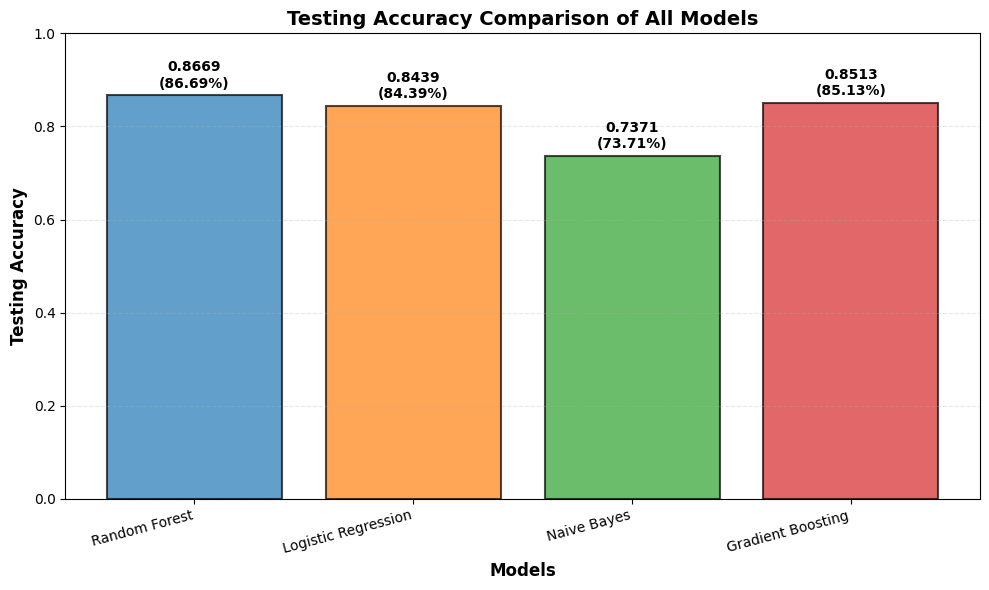

In [95]:
# Graph for Testing Accuracy Comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(models, test_accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7, edgecolor='black', linewidth=1.5)
plt.ylabel('Testing Accuracy', fontsize=12, fontweight='bold')
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.title('Testing Accuracy Comparison of All Models', fontsize=14, fontweight='bold')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on top of bars
for i, (bar, acc) in enumerate(zip(bars, test_accuracies)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.4f}\n({acc*100:.2f}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


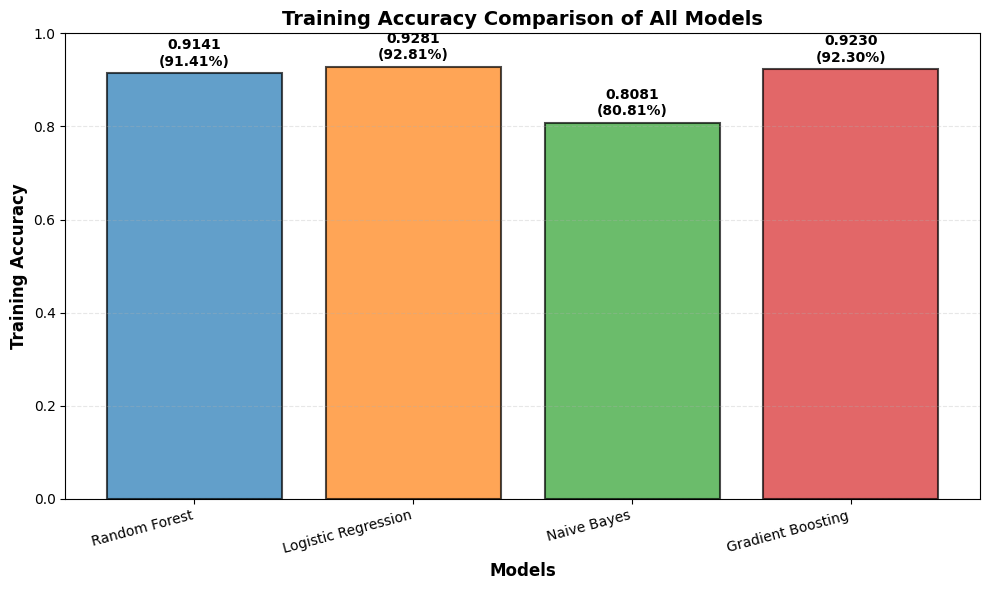

In [96]:
# Graph for Training Accuracy Comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(models, train_accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7, edgecolor='black', linewidth=1.5)
plt.ylabel('Training Accuracy', fontsize=12, fontweight='bold')
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.title('Training Accuracy Comparison of All Models', fontsize=14, fontweight='bold')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on top of bars
for i, (bar, acc) in enumerate(zip(bars, train_accuracies)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.4f}\n({acc*100:.2f}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()
